## Dimensionality Reduction

1. What is Dimensionality Reduction?
    1. Dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.
    2. Feature Extraction - Feature selection approaches try to find a subset of the original variables (also called features or attributes). There are three strategies: 
        1. Filter strategy (e.g. information gain), 
        2. Wrapper strategy (e.g. search guided by accuracy)
        3. Embedded strategy (features are selected to add or be removed while building the model based on the prediction errors).
    3. Feature projection transforms the data in the high-dimensional space to a space of fewer dimensions. The data transformation may be linear, as in principal component analysis (PCA), but many nonlinear dimensionality reduction techniques also exist.

2. Why Dimensionality Reduction?
    1. Space Efficiency - not everyone has huge space to store all dimensions
    2. Computing efficiency - smaller the data, faster are the model
    3. Visualization - we cannot visualize more than 2-3 dimensions easily
    4. Helps to remove Reduntant Features

3. Important Dimensionality Reduction Methods
    1. PCA - Principal Component Analysis
    2. t-SNE - T-distributed Stochastic Neighbor Embedding 
    3. LDA - Linear Discriminant Analysis
        
4. More Resources
    1. [PCA vs LDA](https://plot.ly/ipython-notebooks/principal-component-analysis/)
    2. [Implementing PCA](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)
    3. [PCA vs LDA](https://www.quora.com/What-is-the-difference-between-LDA-and-PCA-for-dimension-reduction)
    4. [Adv of t-SNE over PCA](https://www.quora.com/What-advantages-does-the-t-SNE-algorithm-have-over-PCA)
    5. [Intro to t-SNE](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm)

In [1]:
import numpy as np #math
np.random.seed(1) #for debugging

In [2]:
#Step 1 - Create a dataset
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance

#gaussian distribution
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
class1_sample.T

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116]])

In [3]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance

#gaussian distribution
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20).T
class2_sample.T

array([[ 0.24560206,  2.25286816,  1.51292982],
       [ 0.70190716,  1.48851815,  0.92442829],
       [ 2.13162939,  2.51981682,  3.18557541],
       [-0.39649634, -0.44411381,  0.49553414],
       [ 1.16003707,  1.87616892,  1.31563495],
       [-1.02220122,  0.69379599,  1.82797464],
       [ 1.23009474,  1.76201118,  0.77767186],
       [ 0.79924193,  1.18656139,  1.41005165],
       [ 1.19829972,  1.11900865,  0.32933771],
       [ 1.37756379,  1.12182127,  2.12948391],
       [ 2.19891788,  1.18515642,  0.62471505],
       [ 0.36126959,  1.42349435,  1.07734007],
       [ 0.65614632,  1.04359686,  0.37999916],
       [ 1.69803203,  0.55287144,  2.2245077 ],
       [ 1.40349164,  1.59357852, -0.09491185],
       [ 1.16938243,  1.74055645,  0.0462994 ],
       [ 0.73378149,  1.03261455, -0.37311732],
       [ 1.31515939,  1.84616065,  0.14048406],
       [ 1.35054598, -0.31228341,  0.96130449],
       [-0.61577235,  2.12141771,  1.40890054]])

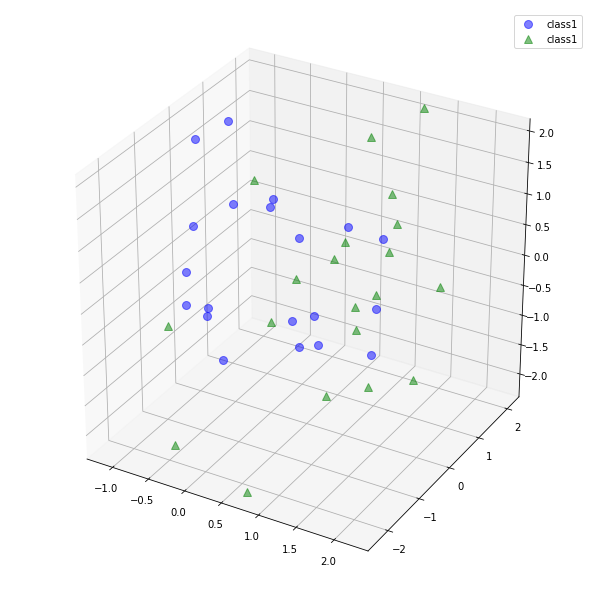

In [4]:
#step 2 - plotting the data
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],
       'o',markersize=8,color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class1_sample[2,:],class1_sample[2,:],
       '^',markersize=8,color='green',alpha=0.5,label='class1')
ax.legend(loc='upper right')

In [5]:
#step 3 - merge the data in one big dataset
all_samples = np.concatenate((class1_sample,class2_sample),axis=1)
all_samples.shape

(3, 40)

In [6]:
#step 4 - compute the dimensional mean vector, it will help compute covariance matrix
#mean for each feature

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print(mean_vector)

[[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


[What is covariance matrix](http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/anova/anova-statistics/what-is-the-variance-covariance-matrix/)

#Variance is the degree by which a random vairable changes with respect to its expected value
#Covariance is the degree by which two different random variables change with respect to each other. 

In [7]:
#step 5 compute covariance matrix
# measures relationship with other feature
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


#### [Eigenvector and eigenvalues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
#### [Also Nice Explanation](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

In [8]:
#step 6 -  compute eigenvector and eigenvalues
# eigenvector gives direction in which data is more spread out
# eigenvalue gives value about how much data is spread out
# each eigen vector is associated with  one eigen value
# the eigenvector with biggest eigen value is principal component

eig_val,eig_vec = np.linalg.eig(cov_mat)
print("Eigen_val\n",eig_val)
print("Eigen_vec\n",eig_vec)

Eigen_val
 [ 1.67100943  0.83832597  0.68195393]
Eigen_vec
 [[-0.49210223 -0.64670286  0.58276136]
 [-0.47927902 -0.35756937 -0.8015209 ]
 [-0.72672348  0.67373552  0.13399043]]


In [9]:
# step 7
# Make a list of (eigenvalue, eigenvector) tuples and sort them
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.67100943053
0.838325973416
0.68195393031


In [10]:
#step 8 - choose k eigenvector
#k is 2 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [11]:
#step 9 transform our data using this eigenpair
transformed = matrix_w.T.dot(all_samples)
print(transformed)

[[-0.12230714  1.78582073 -0.72564846  0.91911067 -0.48120545  1.26186049
   0.49974121 -1.36060904 -0.02630959  0.20346559  1.02990798  0.74684543
  -0.76873682  0.37184198 -0.48040292 -1.30433953 -0.57308381  0.9748035
  -0.78806782 -1.23832629 -2.30009539 -1.73062935 -4.57170736  0.04785487
  -2.42616804 -1.15792646 -2.01497976 -1.98672036 -1.36534078 -2.76311357
  -2.1041081  -1.64296088 -1.09921946 -2.71718701 -1.38545546 -1.44331476
  -0.58485289 -1.63411201 -1.21353834 -1.73760916]
 [-1.18757151 -1.16617976 -0.64124251 -1.74952646  1.10969495  0.18151348
  -0.97722286 -0.72412904 -0.42090149  1.05827266  0.12619324  0.77808138
   1.75701561 -1.00931473 -0.08774954  1.75869787 -0.09616466  0.4009659
   0.49058694 -0.10791262  0.05492635 -0.3633537  -0.13330484  0.74907576
  -0.53466984  1.6445517  -0.90160187  0.00885182 -0.95318056  0.14270558
  -1.4249294  -0.01678979 -0.54147105  0.20291779 -1.54140242 -1.3474191
  -1.09515232 -1.41599875 -0.11407398  0.58889408]]


Text(0.5,1,'Transformed samples with class labels')

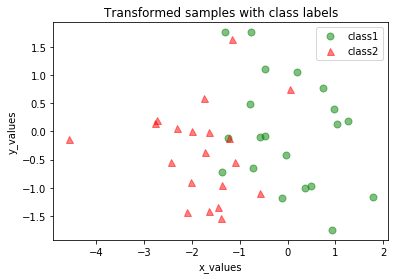

In [12]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

Text(0.5,1,'Transformed samples with class labels')

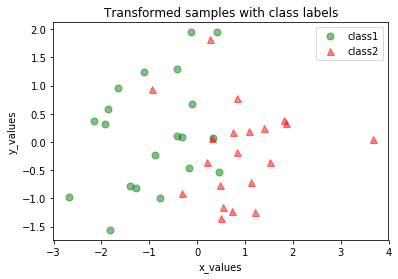

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sk_pca = pca.fit_transform(all_samples.T).T

plt.plot(sk_pca[0,0:20], sk_pca[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(sk_pca[0,20:40], sk_pca[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

Text(0.5,1,'Transformed samples with class labels')

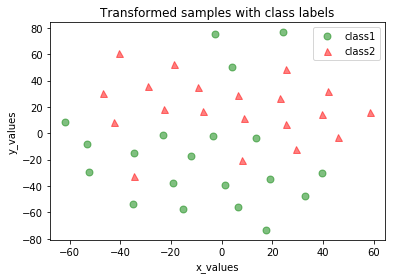

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
sk_tsne = tsne.fit_transform(all_samples.T).T

plt.plot(sk_tsne[0,0:20], sk_tsne[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(sk_tsne[0,20:40], sk_tsne[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

Text(0.5,1,'Transformed samples with class labels')

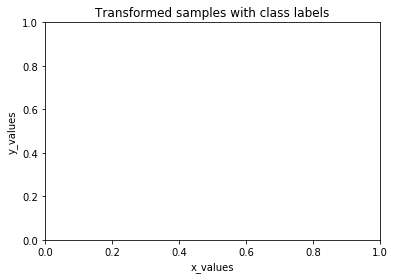

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
#require y value also because it is supervised analysis
sk_lda = lda.fit_transform(all_samples.T,y=[0]*20+[1]*20).T
#plt.plot(sk_lda[0,0:20], sk_lda[1,0:20],
 #        'o', markersize=7, color='green', alpha=0.5, label='class1')
#plt.plot(sk_lda[0,20:40], sk_lda[1,20:40],
 #        '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

In [16]:
# Compare PCA vs t-SNE vs LDA

"""
Best Generic DR method(generally for unsupervised)
PCA

Best Supervised data (Same as PCA except we compute mean vectors for each of the classes)
LDA (Linear Discriminant analysis)

Best Visualization
t-SNE

t-SNE
Step 1 - Compute similarity matrix between all feature vectors
Step 2 - Compute similarity matrix from map points
Step 3 - Use gradient descent to minimimze distance between matrices

LDA (Linear Discriminant Analysis)
Similar to LDA except Compute the  M mean vectors for the different classes from the dataset
instead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels
Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).
"""

'\nBest Generic DR method(generally for unsupervised)\nPCA\n\nBest Supervised data (Same as PCA except we compute mean vectors for each of the classes)\nLDA (Linear Discriminant analysis)\n\nBest Visualization\nt-SNE\n\nt-SNE\nStep 1 - Compute similarity matrix between all feature vectors\nStep 2 - Compute similarity matrix from map points\nStep 3 - Use gradient descent to minimimze distance between matrices\n\nLDA (Linear Discriminant Analysis)\nSimilar to LDA except Compute the  M mean vectors for the different classes from the dataset\ninstead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels\nCompute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).\n'